# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given:<br>
## How to improve SAT participation rates?

## Executive Summary

To improve the participation rates of the SAT in a particular state, a study of data for the SAT and ACT tests from the years 2017 and 2018 was carried out. The data studied includes the participation rates, the average final or composite scores for both tests, as well as scores for each subject/component broken down at state-level across the United States of America.

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017_csv = 'data/sat_2017.csv'
sat_2017 = pd.read_csv(sat_2017_csv)

act_2017_csv = 'data/act_2017.csv'
act_2017 = pd.read_csv(act_2017_csv)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

## Answer: 
For SAT, the sum of the "Reading & Writing" with the "Math" scores does not match the "Total" exactly (+/- 1 mostly).
For ACT, the average of "English", "Math", "Reading" and "Science" does not match the "Composite" score.
Significant difference observed for Maryland in the SAT tests due to "Math" (should be 524) and the ACT tests due to "Science" (should be 23.2).
Wyoming's "Composite" score for the ACT is a string.
Participation varies across states for both tests. Participation also varies between the ACT and SAT within the same state.
National Average was given in the data source for SAT in the website but was not included in the data file.

#### 4a. Does the data look complete? 

## Answer: 
Yes. Although there looks to be some errors, there are no null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

## Answer:
See part 3 for the observed issues.

SAT comprises of the "Reading & Writing" and "Math" sections that have scores ranging from 200 to 800. 
The sum gives the "Total" score which then range from 400 to 1600.

Each individual section of the ACT is scored between 1 and 36. 
The "Composite" score is an average of the individual sections.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# correct Wyoming score removing "x"
act_2017['Composite'][51] = act_2017['Composite'][51].replace("x","")

<ipython-input-5-23e72e94acd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_2017['Composite'][51] = act_2017['Composite'][51].replace("x","")


In [7]:
# correct Maryland Science ACT Score
act_2017['Science'][21] = 23.2

<ipython-input-7-eb93a2454e93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_2017['Science'][21] = 23.2


In [8]:
# correct Maryland Math SAT Score
sat_2017['Math'][20] = 524

<ipython-input-8-21146ce567c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_2017['Math'][20] = 524


#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
#code
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [10]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

## Answer:
Participation in both dataframes are objects.
Composite scores for ACT are objects.
These should all be floats.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#code remove "%" and convert to floats
act_2017['Participation'] = act_2017['Participation'].map(lambda row: row[:-1])
sat_2017['Participation'] = sat_2017['Participation'].map(lambda row: row[:-1])
act_2017['Participation'] = act_2017['Participation'].map(lambda row: float(row))
sat_2017['Participation'] = sat_2017['Participation'].map(lambda row: float(row))
act_2017['Composite'] = act_2017['Composite'].map(lambda row: float(row))

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
#code
#N.A.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [13]:
#code check
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [14]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


- Display the data types again to confirm they are correct.

In [15]:
#Code:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [16]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [17]:
#code
act_2017.columns = ["state", "act_2017_participation", "act_2017_english", "act_2017_math", "act_2017_reading", "act_2017_science", "act_2017_composite"]
sat_2017.columns = ["state", "sat_2017_participation", "sat_2017_readingwriting", "sat_2017_math", "sat_2017_total"]

In [18]:
sat_2017.head()

,state,sat_2017_participation,sat_2017_readingwriting,sat_2017_math,sat_2017_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [19]:
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|Name of State|
|act_201X_participation|float|ACT|Participation within the State in year 201X|
|act_201X_english|float|ACT|English Score for the State in year 201X|
|act_201X_math|float|ACT|Math Score for the State in year 201X|
|act_201X_reading|float|ACT|Reading Score for the State in year 201X|
|act_201X_science|float|ACT|Science Score for the State in year 201X|
|act_201X_composite|float|ACT|Composite Score for the State in year 201X|
|sat_201X_participation|float|SAT|Participation within the State in year 201X|
|sat_201X_readingwriting|int|SAT|Evidence-based Reading and Writing Score for the State in year 201X|
|sat_201X_math|int|SAT|Math Score for the State in year 201X|
|sat_201X_total|int|SAT|Total Score for the State in year 201X|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
#code
act_2017.drop(index=0, inplace=True)

In [21]:
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [22]:
#Code:
combined_2017 = act_2017.merge(sat_2017, on="state")

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [23]:
#code
combined_2017.to_csv("combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [24]:
# import csv files
sat_2018_csv = 'data/sat_2018.csv'
sat_2018 = pd.read_csv(sat_2018_csv)

act_2018_csv = 'data/act_2018.csv'
act_2018 = pd.read_csv(act_2018_csv)

In [25]:
# remove "%" from SAT participation and convert to float

sat_2018['Participation'] = sat_2018['Participation'].map(lambda row: row[:-1])

sat_2018['Participation'] = sat_2018['Participation'].map(lambda row: float(row))

In [26]:
# rename columns using same convention as 2017 

act_2018.columns = ["state", "act_2018_participation", "act_2018_composite", "act_2018_english", "act_2018_math", "act_2018_reading", "act_2018_science"]
sat_2018.columns = ["state", "sat_2018_participation", "sat_2018_readingwriting", "sat_2018_math", "sat_2018_total"]

In [27]:
act_2018.dtypes

state                      object
act_2018_participation      int64
act_2018_composite        float64
act_2018_english          float64
act_2018_math             float64
act_2018_reading          float64
act_2018_science          float64
dtype: object

In [28]:
sat_2018.dtypes

state                       object
sat_2018_participation     float64
sat_2018_readingwriting      int64
sat_2018_math                int64
sat_2018_total               int64
dtype: object

In [29]:
# merge of act & sat scores
combined_2018 = act_2018.merge(sat_2018, on="state")

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [30]:
# merge of 2017 & 2018
final = combined_2017.merge(combined_2018, on="state")

In [31]:
final['act_2018_participation'] = final['act_2018_participation'].map(lambda row: float(row))

In [32]:
final.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_readingwriting,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_readingwriting,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [33]:
#code
final.to_csv("final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [34]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_readingwriting,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [35]:
#code
def stand_def(col):
    μ = np.mean(col)
    n = len(col)
    summation = 0
    for i in range(n):
        summation += ((col[i]-μ)**2)
    σ = np.sqrt((1/n)*summation)
    return σ

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [36]:
#Code:
sd = {(final.columns[i]) : (stand_def(final[final.columns[i]])) for i in range(1,len(final.columns))}
sd

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_readingwriting': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 33.745194881997506,
 'act_2018_composite': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'sat_2018_participation': 36.946619223539415,
 'sat_2018_readingwriting': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

In [37]:
final.describe().T['std']

act_2017_participation     32.140842
act_2017_english            2.353677
act_2017_math               1.981989
act_2017_reading            2.067271
act_2017_science            1.739353
act_2017_composite          2.020695
sat_2017_participation     35.276632
sat_2017_readingwriting    45.666901
sat_2017_math              47.121395
sat_2017_total             92.494812
act_2018_participation     34.080976
act_2018_composite          2.106278
act_2018_english            2.446356
act_2018_math               2.035765
act_2018_reading            2.167245
act_2018_science            1.870114
sat_2018_participation     37.314256
sat_2018_readingwriting    47.502627
sat_2018_math              47.772623
sat_2018_total             94.155083
Name: std, dtype: float64

In [38]:
np.std(final)

act_2017_participation     31.824176
act_2017_english            2.330488
act_2017_math               1.962462
act_2017_reading            2.046903
act_2017_science            1.722216
act_2017_composite          2.000786
sat_2017_participation     34.929071
sat_2017_readingwriting    45.216970
sat_2017_math              46.657134
sat_2017_total             91.583511
act_2018_participation     33.745195
act_2018_composite          2.085526
act_2018_english            2.422254
act_2018_math               2.015707
act_2018_reading            2.145892
act_2018_science            1.851689
sat_2018_participation     36.946619
sat_2018_readingwriting    47.034610
sat_2018_math              47.301946
sat_2018_total             93.227424
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Manually calculated values match the np.std method but panda's describe gives a slightly different output.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [39]:
final.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_readingwriting,sat_2017_math,...,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,sat_2018_participation,sat_2018_readingwriting,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [40]:
# highest and lowest participation rates for the :2017 SAT
print(final[['state','sat_2017_participation']].sort_values('sat_2017_participation').head())
print(final[['state','sat_2017_participation']].sort_values('sat_2017_participation', ascending=False).head())

           state  sat_2017_participation
34  North Dakota                     2.0
24   Mississippi                     2.0
15          Iowa                     2.0
25      Missouri                     3.0
44          Utah                     3.0
                   state  sat_2017_participation
8   District of Columbia                   100.0
22              Michigan                   100.0
6            Connecticut                   100.0
7               Delaware                   100.0
29         New Hampshire                    96.0


In [41]:
# highest and lowest participation rates for the :2018 SAT
print(final[['state','sat_2018_participation']].sort_values('sat_2018_participation').head(10))
print(final[['state','sat_2018_participation']].sort_values('sat_2018_participation', ascending=False).head(10))

           state  sat_2018_participation
34  North Dakota                     2.0
50       Wyoming                     3.0
41  South Dakota                     3.0
27      Nebraska                     3.0
49     Wisconsin                     3.0
24   Mississippi                     3.0
15          Iowa                     3.0
44          Utah                     4.0
23     Minnesota                     4.0
18     Louisiana                     4.0
                   state  sat_2018_participation
5               Colorado                   100.0
6            Connecticut                   100.0
7               Delaware                   100.0
22              Michigan                   100.0
12                 Idaho                   100.0
19                 Maine                    99.0
13              Illinois                    99.0
39          Rhode Island                    97.0
29         New Hampshire                    96.0
8   District of Columbia                    92.0


In [42]:
# highest and lowest participation rates for the :2017 ACT
print(final[['state','act_2017_participation']].sort_values('act_2017_participation').head(20))
print(final[['state','act_2017_participation']].sort_values('act_2017_participation', ascending=False).head(20))

                   state  act_2017_participation
19                 Maine                     8.0
29         New Hampshire                    18.0
7               Delaware                    18.0
39          Rhode Island                    21.0
38          Pennsylvania                    23.0
20              Maryland                    28.0
45               Vermont                    29.0
21         Massachusetts                    29.0
22              Michigan                    29.0
46              Virginia                    29.0
47            Washington                    29.0
4             California                    31.0
32              New York                    31.0
6            Connecticut                    31.0
8   District of Columbia                    32.0
30            New Jersey                    34.0
14               Indiana                    35.0
12                 Idaho                    38.0
37                Oregon                    40.0
43                 T

In [43]:
# highest and lowest participation rates for the :2018 ACT
print(final[['state','act_2018_participation']].sort_values('act_2018_participation').head(20))
print(final[['state','act_2018_participation']].sort_values('act_2018_participation', ascending=False).head(20))

                   state  act_2018_participation
19                 Maine                     7.0
39          Rhode Island                    15.0
29         New Hampshire                    16.0
7               Delaware                    17.0
38          Pennsylvania                    20.0
22              Michigan                    22.0
47            Washington                    24.0
45               Vermont                    24.0
46              Virginia                    24.0
21         Massachusetts                    25.0
6            Connecticut                    26.0
4             California                    27.0
32              New York                    27.0
5               Colorado                    30.0
30            New Jersey                    31.0
20              Maryland                    31.0
14               Indiana                    32.0
8   District of Columbia                    32.0
1                 Alaska                    33.0
12                 I

In [44]:
# highest and lowest mean total/composite scores for the :2017 SAT
print(final[['state','sat_2017_total']].sort_values('sat_2017_total').head())
print(final[['state','sat_2017_total']].sort_values('sat_2017_total', ascending=False).head())

                   state  sat_2017_total
8   District of Columbia             950
7               Delaware             996
12                 Idaho            1005
22              Michigan            1005
19                 Maine            1012
        state  sat_2017_total
23  Minnesota            1295
49  Wisconsin            1291
15       Iowa            1275
25   Missouri            1271
16     Kansas            1260


In [45]:
# highest and lowest mean total/composite scores for the :2018 SAT
# highest and lowest mean total/composite scores for the :2017 SAT
print(final[['state','sat_2018_total']].sort_values('sat_2018_total').head())
print(final[['state','sat_2018_total']].sort_values('sat_2018_total', ascending=False).head())

                   state  sat_2018_total
8   District of Columbia             977
7               Delaware             998
48         West Virginia             999
12                 Idaho            1001
44                  Utah            1010
           state  sat_2018_total
23     Minnesota            1298
49     Wisconsin            1294
34  North Dakota            1283
15          Iowa            1265
16        Kansas            1265


In [46]:
# highest and lowest mean total/composite scores for the :2017 ACT
print(final[['state','act_2017_composite']].sort_values('act_2017_composite').head())
print(final[['state','act_2017_composite']].sort_values('act_2017_composite', ascending=False).head())

             state  act_2017_composite
28          Nevada                17.8
24     Mississippi                18.6
40  South Carolina                18.7
11          Hawaii                19.0
33  North Carolina                19.1
                   state  act_2017_composite
29         New Hampshire                25.5
21         Massachusetts                25.4
6            Connecticut                25.2
19                 Maine                24.3
8   District of Columbia                24.2


In [47]:
# highest and lowest mean total/composite scores for the :2018 ACT
print(final[['state','act_2018_composite']].sort_values('act_2018_composite').head())
print(final[['state','act_2018_composite']].sort_values('act_2018_composite', ascending=False).head())

             state  act_2018_composite
28          Nevada                17.7
40  South Carolina                18.3
24     Mississippi                18.6
11          Hawaii                18.9
0          Alabama                19.1
            state  act_2018_composite
6     Connecticut                25.6
21  Massachusetts                25.5
29  New Hampshire                25.1
32       New York                24.5
22       Michigan                24.4


In [48]:
# states with 100% participation on a given test have a rate change year-to-year
final[['state','act_2017_participation','act_2018_participation']].loc[(final['act_2017_participation']==100) & (final['act_2018_participation']!=100)]

,state,act_2017_participation,act_2018_participation
5,Colorado,100.0,30.0
23,Minnesota,100.0,99.0


In [49]:
final[['state','sat_2017_participation','sat_2018_participation']].loc[(final['sat_2017_participation']==100) & (final['sat_2018_participation']!=100)]

,state,sat_2017_participation,sat_2018_participation
8,District of Columbia,100.0,92.0


In [50]:
final[['state','act_2017_participation','act_2018_participation']].loc[(final['act_2017_participation']!=100) & (final['act_2018_participation']==100)]

,state,act_2017_participation,act_2018_participation
27,Nebraska,84.0,100.0
35,Ohio,75.0,100.0


In [51]:
final[['state','sat_2017_participation','sat_2018_participation']].loc[(final['sat_2017_participation']!=100) & (final['sat_2018_participation']==100)]

,state,sat_2017_participation,sat_2018_participation
5,Colorado,11.0,100.0
12,Idaho,93.0,100.0


In [52]:
# any states have >50% participation on both tests either year?
final[['state','sat_2017_participation','act_2017_participation']].loc[(final['sat_2017_participation']>50) & (final['act_2017_participation']>50)]

,state,sat_2017_participation,act_2017_participation
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In [53]:
final[['state','sat_2018_participation','act_2018_participation']].loc[(final['sat_2018_participation']>50) & (final['act_2018_participation']>50)]

,state,sat_2018_participation,act_2018_participation
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


## Identify any interesting states & make a note of these stating why:
Colorado's ACT participation dropped from 100% to 30% between 2017 and 2018 while it's SAT participation increased from 11% to 100%.<br> 
Illinois' ACT participation dropped from 93% to 43% between 2017 and 2018 while it's SAT participation increased from 9% to 99%.<br>
These are likely due to changes in local state government or local state university policies or requirements.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

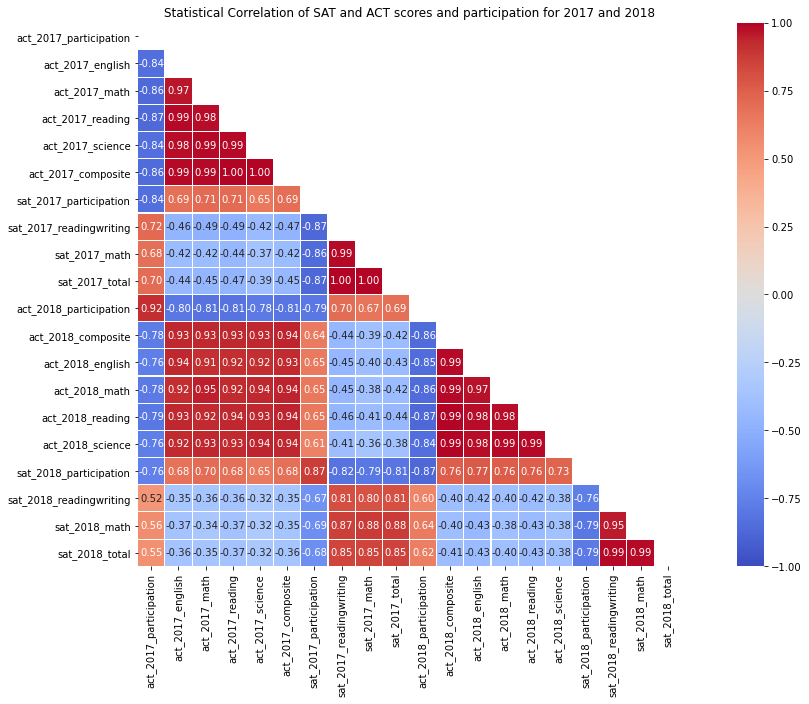

In [54]:
mask = np.triu(final.corr())
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_title("Statistical Correlation of SAT and ACT scores and participation for 2017 and 2018")
sns.heatmap(final.corr(), ax=ax, vmin=-1.0, vmax=1.0, cmap='coolwarm', annot=True, square=True, mask=mask, linewidths=.1, fmt=".2f");

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [55]:
def subplot_histograms(dataframe, breadth, height, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, xmin, xmax, xtick, ymin, ymax, ytick):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(breadth, height), nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=range(ymin,ymax+ytick,ytick), orientation='horizontal') # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].set_xlim(xmin,xmax)
        ax[i].set_xticks(range(xmin,xmax+xtick,xtick))
        ax[i].set_ylim(ymin,ymax)
        ax[i].set_yticks(range(ymin,ymax+ytick,ytick))

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

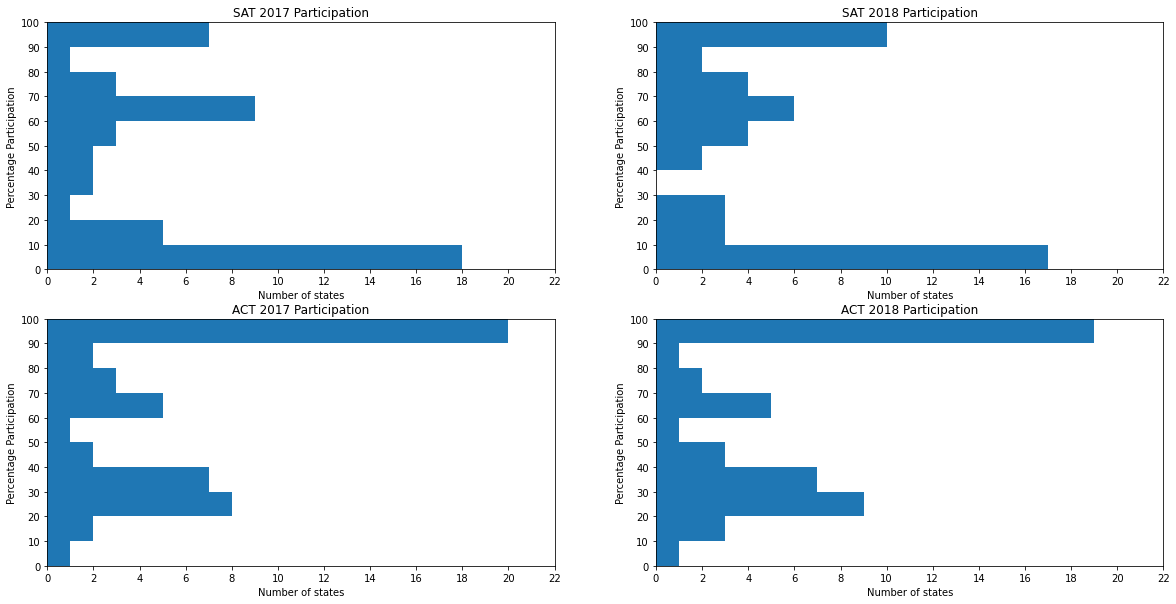

In [56]:
# Code
parti_cols_list  = ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation']
parti_titles_list  = ['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 'ACT 2018 Participation']
parti_xlabels_list = ['Number of states', 'Number of states', 'Number of states', 'Number of states']
parti_ylabels_list = ['Percentage Participation', 'Percentage Participation', 'Percentage Participation', 'Percentage Participation',]
subplot_histograms(final, 20, 10, parti_cols_list, parti_titles_list, parti_xlabels_list, parti_ylabels_list, 0, 22, 2, 0, 100, 10)


## Interpretation:
Comparing across both years, the distribution of the SAT participation did not differ much between 2017 and 2018. The same was observed for the ACT. In general, the distributions show 3 groups for both the SAT and ACT tests:<br> 
1) Full or almost full participation<br>
2) Moderately high participation<br>
3) Low participation<br><br>
For the low participation group, the data for SAT tests indicates a high number of states where the number of students attempting the SAT is minimal in terms of percentage whereas the data for the ACT tests indicates that roughly 30% of the students attempt the ACT.

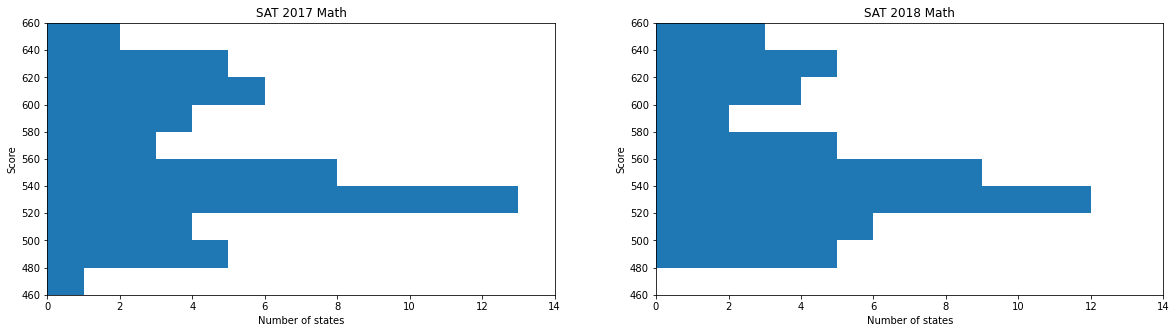

In [57]:
sat_math_cols_list  = ['sat_2017_math', 'sat_2018_math']
sat_math_titles_list  = ['SAT 2017 Math', 'SAT 2018 Math']
sat_math_xlabels_list = ['Number of states', 'Number of states']
sat_math_ylabels_list = ['Score', 'Score']
subplot_histograms(final, 20, 5, sat_math_cols_list, sat_math_titles_list, sat_math_xlabels_list, sat_math_ylabels_list, 0, 14, 2, 460, 660, 20)

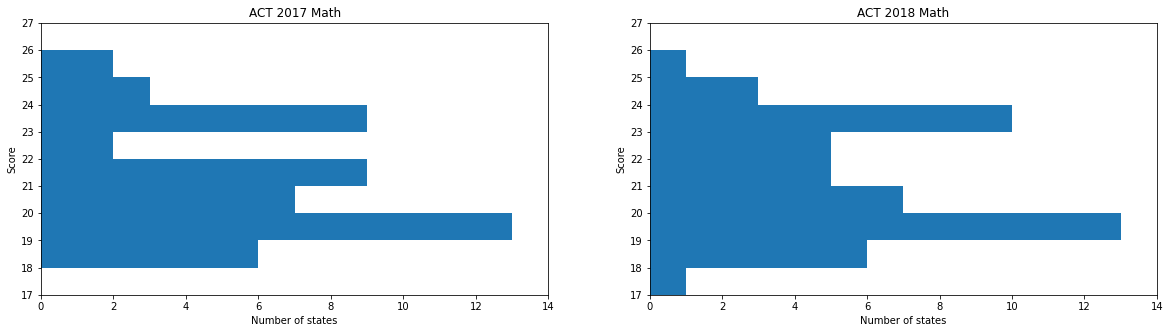

In [58]:
act_math_cols_list  = ['act_2017_math', 'act_2018_math']
act_math_titles_list  = ['ACT 2017 Math', 'ACT 2018 Math']
act_math_xlabels_list = ['Number of states', 'Number of states']
act_math_ylabels_list = ['Score', 'Score']
subplot_histograms(final, 20, 5, act_math_cols_list, act_math_titles_list, act_math_xlabels_list, act_math_ylabels_list, 0, 14, 2, 17, 27, 1)

## Interpretation:
Comparing across both tests and years, the distribution of the Math scores did not differ much between 2017 and 2018 or between the SAT and ACT. In general, the distributions show 2 groups for both the SAT and ACT tests:<br>
1) Higher performance<br>
2) Lower performance

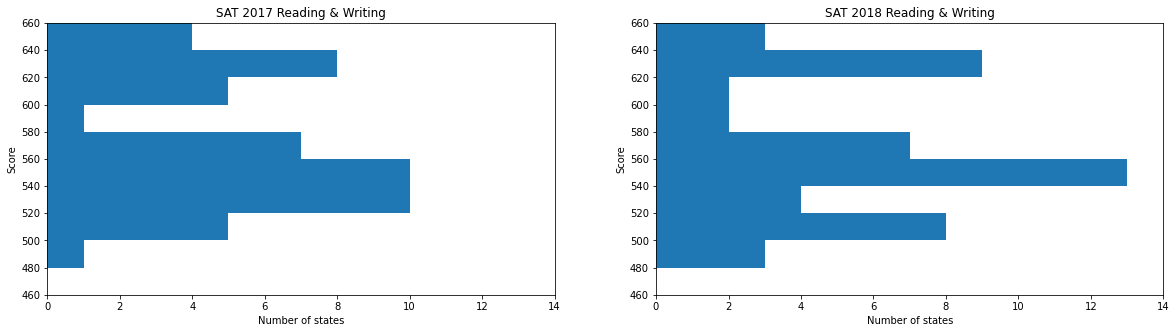

In [59]:
sat_rw_cols_list  = ['sat_2017_readingwriting', 'sat_2018_readingwriting']
sat_rw_titles_list  = ['SAT 2017 Reading & Writing', 'SAT 2018 Reading & Writing']
sat_rw_xlabels_list = ['Number of states', 'Number of states']
sat_rw_ylabels_list = ['Score', 'Score']
subplot_histograms(final, 20, 5, sat_rw_cols_list, sat_rw_titles_list, sat_rw_xlabels_list, sat_rw_ylabels_list, 0, 14, 2, 460, 660, 20)

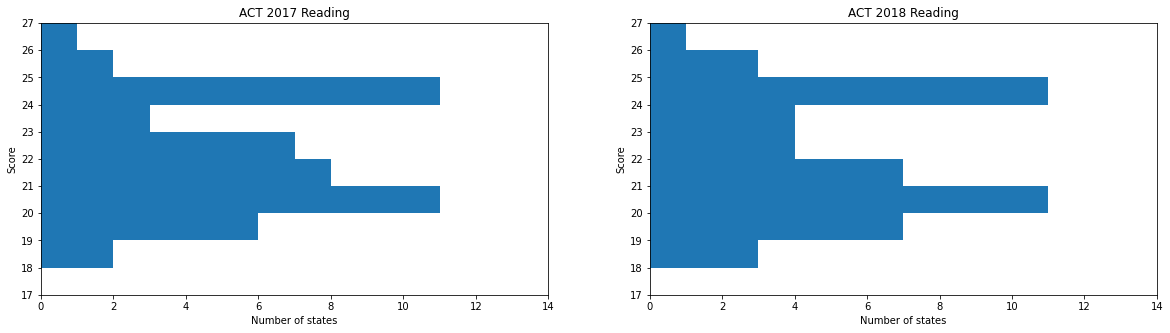

In [60]:
act_reading_cols_list  = ['act_2017_reading', 'act_2018_reading']
act_reading_titles_list  = ['ACT 2017 Reading', 'ACT 2018 Reading']
act_reading_xlabels_list = ['Number of states', 'Number of states']
act_reading_ylabels_list = ['Score', 'Score']
subplot_histograms(final, 20, 5, act_reading_cols_list, act_reading_titles_list, act_reading_xlabels_list, act_reading_ylabels_list, 0, 14, 2, 17, 27, 1)

## Interpretation:
Comparing across both tests and years, the distribution of the Reading & Writing scores did not differ much between 2017 and 2018 or between the SAT and ACT. Similar to the scores for Math, the distributions generally show 2 groups for both the SAT and ACT tests:<br>
1) Higher performance<br>
2) Lower performance

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [61]:
def scatterplot(col_1, col_2, x_label, y_label, xmin, xmax, xtick, ymin, ymax, ytick, title):
    plt.figure(figsize=(8,5))
    plt.grid(b=True)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(xmin,xmax)
    plt.xticks(range(xmin,xmax+xtick,xtick))
    plt.ylim(ymin,ymax)
    plt.yticks(range(ymin,ymax+ytick,ytick))
    plt.scatter(col_1,col_2);

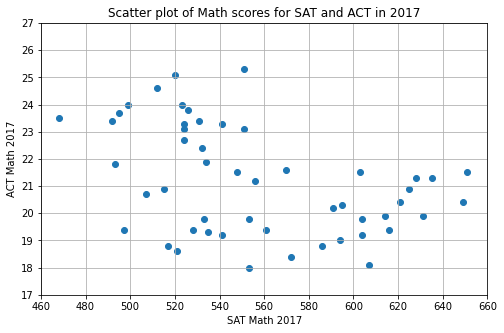

In [62]:
# SAT vs. ACT math scores for 2017
scatterplot(final['sat_2017_math'],final['act_2017_math'],'SAT Math 2017','ACT Math 2017',460,660,20,17,27,1,'Scatter plot of Math scores for SAT and ACT in 2017');

## Interpretation:
Comparing the tests scores for Math between the SAT and ACT, the correlation seems to be weak. This indicates that students that do well in the Math test for the SAT may not necessarily do well in the Math test for the ACT.

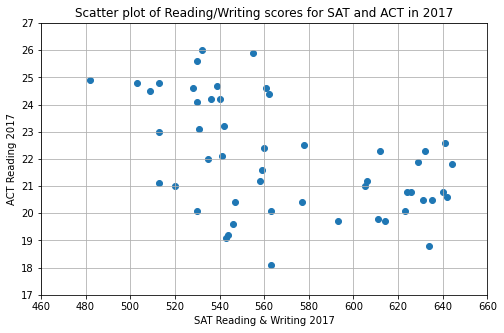

In [63]:
# SAT vs. ACT verbal/reading scores for 2017
scatterplot(final['sat_2017_readingwriting'],final['act_2017_reading'],'SAT Reading & Writing 2017','ACT Reading 2017',460,660,20,17,27,1,'Scatter plot of Reading/Writing scores for SAT and ACT in 2017');

## Interpretation:
Comparing the tests scores for Reading & Writing between the SAT and ACT, the correlation seems to be weak. This indicates that students that do well in the Reading & Writing test for the SAT may not necessarily do well in the Reading test for the ACT.

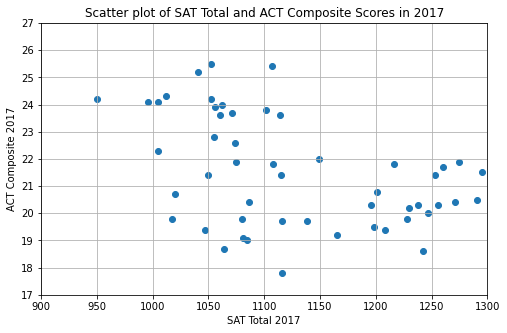

In [64]:
# SAT vs. ACT total/composite scores for 2017
scatterplot(final['sat_2017_total'],final['act_2017_composite'],'SAT Total 2017','ACT Composite 2017',900,1300,50,17,27,1,'Scatter plot of SAT Total and ACT Composite Scores in 2017');

## Interpretation:
Comparing the final or composite scores between the SAT and ACT, the correlation seems to be weak. This indicates that students that do well in the SAT may not necessarily do well in the ACT.

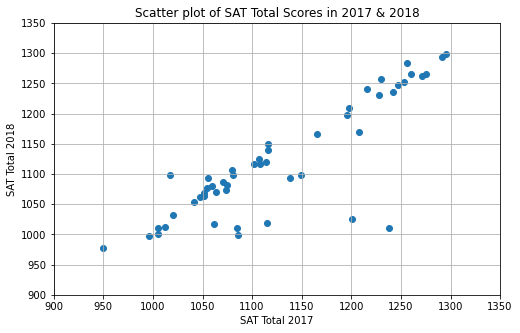

In [65]:
# Total scores for SAT 2017 vs. 2018
scatterplot(final['sat_2017_total'],final['sat_2018_total'],'SAT Total 2017','SAT Total 2018',900,1350,50,900,1350,50,'Scatter plot of SAT Total Scores in 2017 & 2018');

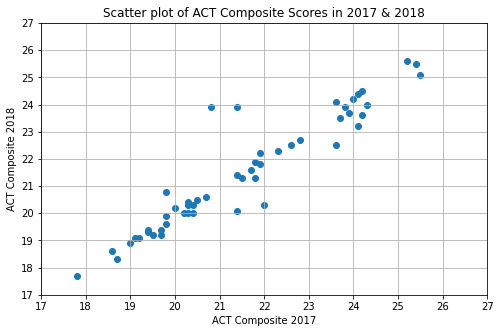

In [66]:
# Composite scores for ACT 2017 vs. 2018
scatterplot(final['act_2017_composite'],final['act_2018_composite'],'ACT Composite 2017','ACT Composite 2018',17,27,1,17,27,1,'Scatter plot of ACT Composite Scores in 2017 & 2018');

## Interpretation:
Comparing the final or composite scores of the SAT and ACT across years, a strong linear correlation is observed. This indicates that the scores do not differ much across year for the individual states.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [67]:
# Code
def box_plt(df, width, height, x_label, title):
    plt.figure(figsize=(width,height))
    sns.boxplot(data = df, orient = "h")
    plt.title(title)
    plt.xlabel(x_label)

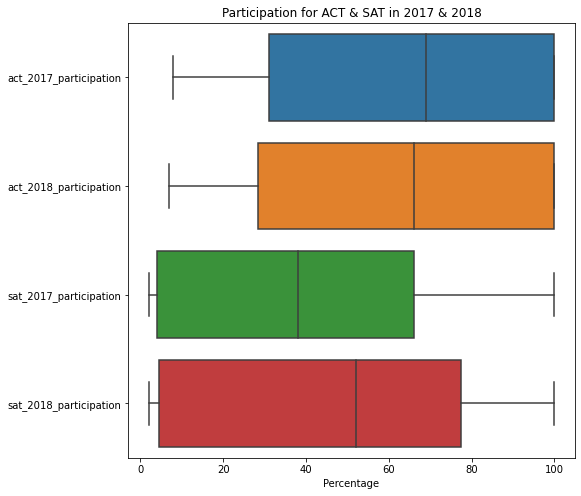

In [68]:
Parti = final[['act_2017_participation','act_2018_participation','sat_2017_participation','sat_2018_participation']]
box_plt(Parti,8,8,"Percentage",'Participation for ACT & SAT in 2017 & 2018')

## Interpretation:
The SAT generally has less participation as compared to the ACT. Nonetheless, a significant increase in the mean and spread of the participation was observed on the SAT between 2017 and 2018 while a slight decrease was observed for the mean of the ACT coupled with a slight increase in spread in the corresponding period.

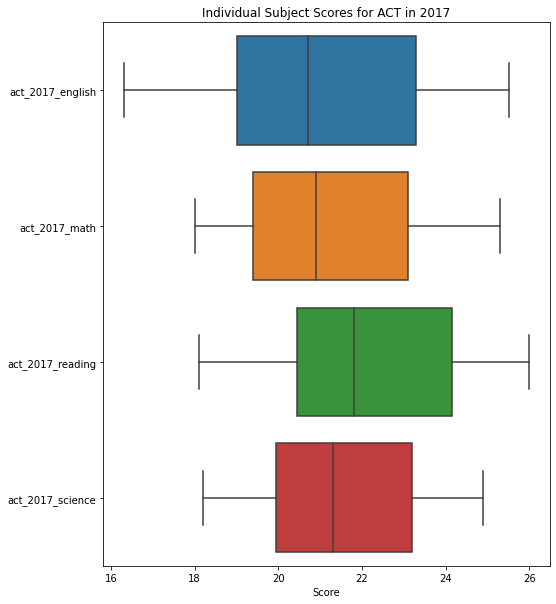

In [69]:
ACT_subs_17 = final[['act_2017_english','act_2017_math','act_2017_reading','act_2017_science']]
box_plt(ACT_subs_17,8,10,"Score",'Individual Subject Scores for ACT in 2017')

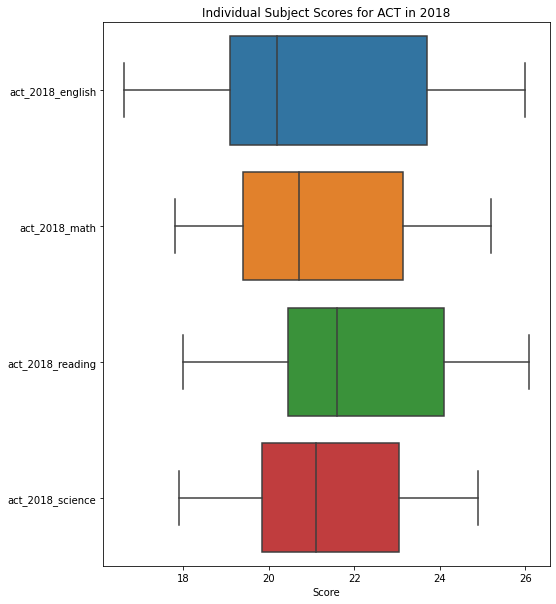

In [70]:
ACT_subs_18 = final[['act_2018_english','act_2018_math','act_2018_reading','act_2018_science']]
box_plt(ACT_subs_18,8,10,"Score",'Individual Subject Scores for ACT in 2018')

## Interpretation:
For the ACT, based on the means observed, the performance from best to worse are in the order of reading, science, math and english for both years. The mean for english in 2018 is observed to be lower than that of 2017. The spread of the various subject scores remained similar across both years.

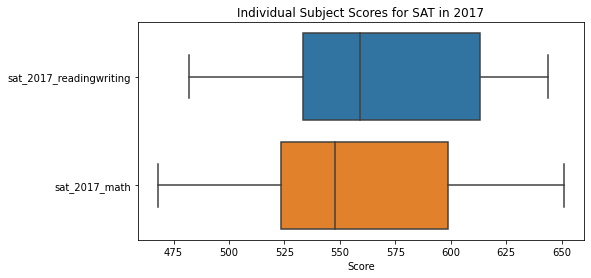

In [71]:
SAT_subs_17 = final[['sat_2017_readingwriting','sat_2017_math']]
box_plt(SAT_subs_17,8,4,"Score",'Individual Subject Scores for SAT in 2017')

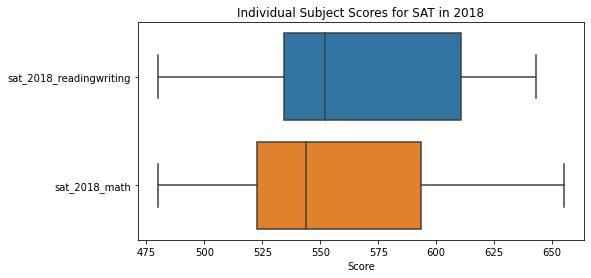

In [72]:
SAT_subs_18 = final[['sat_2018_readingwriting','sat_2018_math']]
box_plt(SAT_subs_18,8,4,"Score",'Individual Subject Scores for SAT in 2018')

## Interpretation:
For the SAT, based on the means observed, students generally performed better for reading and writing as compared to math. The means for both subjects in 2018 are observed to be lower than those of 2017. The spread of both subject scores remained similar across both years.

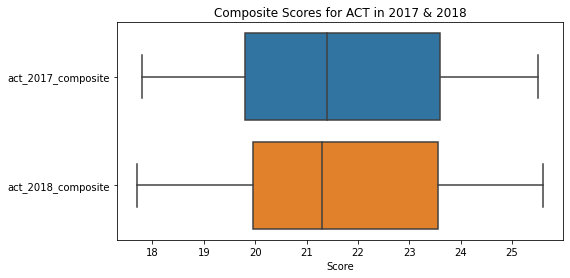

In [73]:
ACT_comp = final[['act_2017_composite','act_2018_composite']]
box_plt(ACT_comp,8,4,"Score",'Composite Scores for ACT in 2017 & 2018')

## Interpretation:
For the ACT, based on the means observed, students performed slightly better in 2017 as compared to 2018. The spread of the 2018 composite score was also observed to be slightly less than that of 2017.

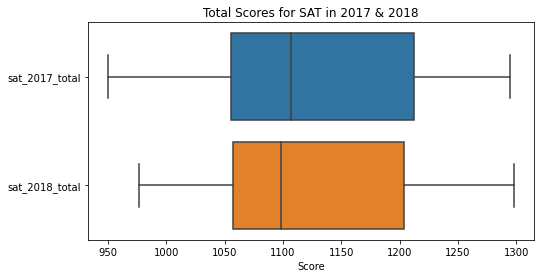

In [74]:
SAT_fin = final[['sat_2017_total','sat_2018_total']]
box_plt(SAT_fin,8,4,"Score",'Total Scores for SAT in 2017 & 2018')

## Interpretation:
For the SAT, based on the means observed, students performed slightly better in 2017 as compared to 2018 in a manner similar to the ACT scores. The spread of the 2018 final score was also observed to be slightly less than that of 2017.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [75]:
# Compare low and high participation rates with overall scores
high_part_comp = final[['act_2017_composite']].loc[(final['act_2017_participation']>90)]
high_part_comp.reset_index(inplace=True, drop=True)

In [76]:
low_part_comp = final[['act_2017_composite']].loc[(final['act_2017_participation']<=40)]
low_part_comp.reset_index(inplace=True, drop=True)

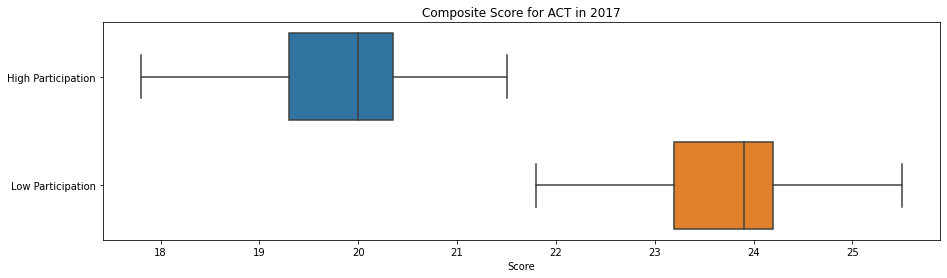

In [89]:
hiparti_vs_lowparti = pd.concat([high_part_comp, low_part_comp], axis=1)
hiparti_vs_lowparti.columns = ['High Participation', 'Low Participation']
box_plt(hiparti_vs_lowparti,15,4,"Score",'Composite Score for ACT in 2017')

## Interpretation:
Based on the above plot, it is clearly shown that the states with lower participation rates score better than the states with higher participation rates. Although it is not plotted, this phenomena is common across both tests and both years.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

## Answers:
1) The SAT generally has less participation as compared to the ACT with the means of 2017 being 39.8% versus 65.5% and the 2018 means being 45.7% vs 61.6%. Nonetheless, an increase was observed on the SAT participation from from 2017 to 2018. However, based on the p-value from a two sample t-test, this does not provide sufficient evidence to conclude that this difference is significant.<br><br>
2) Based on the means observed, students performed slightly better in 2017 as compared to 2018 for both tests. 21.5 versus 21.4 for the ACT and 1126 versus 1120 for the SAT. However, based on the p-value from a two sample t-test on the SAT total scores, this does not provide sufficient evidence to conclude that this difference is significant.<br><br>
3) Based on the means observed, states with low participation rates scored better than those with high participation rates at 23.7 versus 19.9. Based on the p-value from a two sample t-test which was very small, the null hypothesis can be rejected. There is sufficient evidence to conclude that the difference between the mean of the states with high participation and the mean of the states with low participation in the 2017 ACT is significant. Although it is not calculated, this phenomena is common across both tests and both years.<br><br>
4) Colorado's ACT participation dropped from 100% to 30% between 2017 and 2018 while it's SAT participation increased from 11% to 100%. Illinois' ACT participation dropped from 93% to 43% between 2017 and 2018 while it's SAT participation increased from 9% to 99%. These are likely due to changes in local state government or local state university policies or requirements.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

## Answer:
No.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

## Answer:
As illustrated in the histograms, as well as the additional box-plot above, the distribution of the performance shows two groups: the states with higher participation rates and the states with lower participation rates. The heatmap also shows a strong negative correlation between participation rates and scores.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

## Answer:
The correlation shown in the heatmap gives a value of -0.84. Thus, it can be said generally that states tend to favor one test over the other so the majority of the students in any particular state will either take the SAT or the ACT only. Nonetheless, the participation figures are very general and are not sufficient to make good statistical inferences. It is unclear how the participation figures were obtained and reported. One example of a factor that could have affected the figures would be the fact that it is unknown whether any filtering was done based on the eligibility of the students in that state (some states may actively filter out ineligible students while others may simply report figures based on age group)

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

## Answer:
No. The correlation between the math scores for the SAT and ACT is weak as can be seen from the scatterplot as well as the heatmap.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [78]:
# Code two-sample t-test
high_part_comp.var()

act_2017_composite    0.894854
dtype: float64

In [79]:
low_part_comp.var()

act_2017_composite    1.140234
dtype: float64

In [95]:
high_part_comp.mean()

act_2017_composite    19.852632
dtype: float64

In [96]:
low_part_comp.mean()

act_2017_composite    23.736842
dtype: float64

In [80]:
t_stat, p_value = stats.ttest_ind(high_part_comp, low_part_comp, equal_var=False)

In [81]:
p_value

array([6.54136473e-14])

## Result of hypothesis testing (For 𝛼 =0.05 ): 
Because p_value is very small, and definitely less than 0.05, the null hypothesis can be rejected. Sufficient evidence to conclude that the difference between the mean of the states with high participation and the mean of the states with low participation in the 2017 ACT is significant. Although it is not calculated, this phenomena is common across both tests and both years.

In [90]:
t_stat2, p_value2 = stats.ttest_ind(final['sat_2017_participation'], final['sat_2018_participation'], equal_var=False)

In [91]:
p_value2

0.41062697785955005

## Result of hypothesis testing (For 𝛼 =0.05 ): 
Because p_value is 0.41, which is more than 0.05, the null hypothesis cannot be rejected. There isn't sufficient evidence to conclude that the difference between the participation of the SAT across both years is significant.

In [93]:
t_stat3, p_value3 = stats.ttest_ind(final['sat_2017_total'], final['sat_2018_total'], equal_var=False)

In [94]:
p_value3

0.7429291116643162

## Result of hypothesis testing (For 𝛼 =0.05 ): 
Because p_value is 0.74, which is more than 0.05, the null hypothesis cannot be rejected. There isn't sufficient evidence to conclude that the difference between the final SAT scores across both years is significant.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Minnesota is the "smartest" state. Within the group of states that have full ACT participation, Minnesota has the highest ACT scores for both 2017 and 2018. Also, the highest average SAT scores for both years are from Minnesota as well. A quick search has yielded a link whereby IQ, SAT and ACT scores were taken into account placing Minnesota at 2nd.<br>
https://bgr.com/2020/09/19/dumbest-states-united-states-ranking/<br>
It is likely that Massachusettes placed first in this link since it houses the institution of MIT. Thus, ignoring this group of outliers that would have significantly raised the state's overall "smartness" score, it ties in with the findings of this study that Minnesota is indeed the "smartest" state.<br><br>

As noted at the end of the EDA section, the states of Colorado & Illinois show a switch from the ACT to the SAT. A quick search has yielded the following articles confirming this:<br>
https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/<br>
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Takeaways and recommendations:
Based on the results of the study, the biggest swings in the take-up rate of the SAT came when state-wide policies were implemented favoring the SAT over the ACT. Funds provided to improve participation rates for the SAT should be diverted towards lobbying state governments to take up the SAT.<br><br>

## Choose a state:
The list of states that administer the SAT can be found in the following link:<br>
https://blog.prepscholar.com/which-states-require-the-sat<br><br>

Ignoring the states whereby the SAT is already compulsory, one potential state to lobby in would be Kentucky. It's participation rate for both years stand at a measly 4% while it actually has better than average performance with total scores of 1247 and 1248 for the years 2017 and 2018 respectively. Since Kentucky has higher than average total scores, the local government is likely to be receptive to lobbying efforts. Also, with such a low participation rate of 4%, this would represent the biggest potential increase in percentage participation observed should these lobbying efforts by the College Board be successful.<br><br>

## Additional data:
The data provided was mainly in the form of test scores as well as very general figures for participation. Logically speaking, while there may be some correlation between grades and participation, this correlation does not seem very useful for convincing states or students to take up the SAT, especially since they are inversely related.<br><br>

The main reason why any student would take the SAT would be to secure college admission and/or scholarships. A more useful set of data for this study would be the number of colleges/universities/scholarships that require the SAT for admissions/consideration.